# Time Series Analysis

### 1. Importing Packages

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 2. Data: 
### Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,” which collected CO2 samples from March 1958 to December 2001

In [3]:
data = sm.datasets.co2.load_pandas()
co2=data.data
co2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [4]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

### 3.  W-Sat meand weely sample so converting weekly sample to monthly by taking mean

In [5]:
y = co2['co2'].resample('MS').mean()
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

### 4. If index is datstamp pandas has ability to handle date stamp indices quickly

In [6]:
y['1996':]

1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 72, dtype: float64

In [7]:
y['1997-10-01':'1998-10-01'] #including both dates

1997-10-01    360.750
1997-11-01    362.380
1997-12-01    364.250
1998-01-01    365.340
1998-02-01    366.200
1998-03-01    367.375
1998-04-01    368.525
1998-05-01    369.140
1998-06-01    368.750
1998-07-01    367.600
1998-08-01    365.720
1998-09-01    363.925
1998-10-01    364.320
Freq: MS, Name: co2, dtype: float64

### 5. Checking and replacing null values with last non-null

In [8]:
y.isnull().sum()

5

In [9]:
y = y.fillna(y.bfill())
y.isnull().sum()

0

### 6. Visulaizing data

With Time series data 3 major things to look at:
* seasonality: does the data display a clear periodic pattern like season repeats every year ?
* trend: does the data follow a consistent upwards or downward slope may be for specific time ?
* noise: are there any outlier points or missing values that are not consistent with the rest of the data?

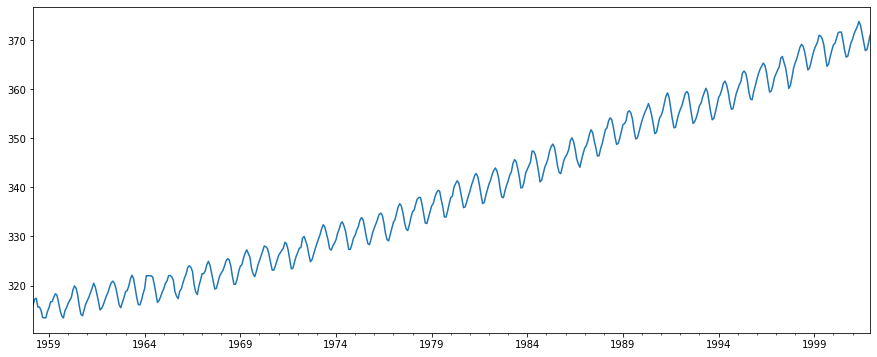

In [10]:
#using matplotlib to visaulize
y.plot(figsize=(15, 6))
plt.show()

We can see 2 imp things:
* Trend is upwards
* There is a seasonality

Now we will use stats decomposition method to decompose data into three"
1. trend
2. seasonality
3. noise

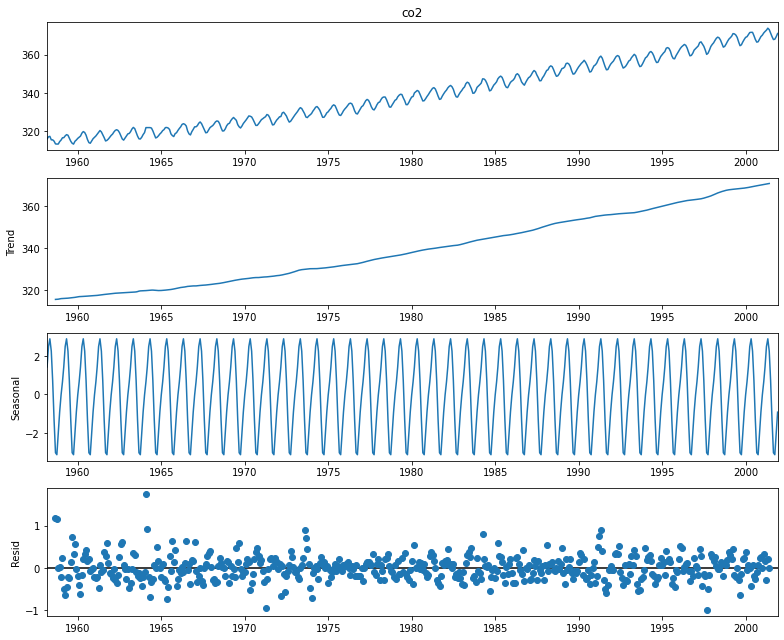

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #to make bigger figure

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Models

### 1. Persistance model
> Simple Model where give predicted value as previous day value

> Just to understand concepts of time series

### 2. Auto Regression Models
> An autoregression model is a linear regression model that uses lagged variables as input variables.

> X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)

### Few autocorrelation plots

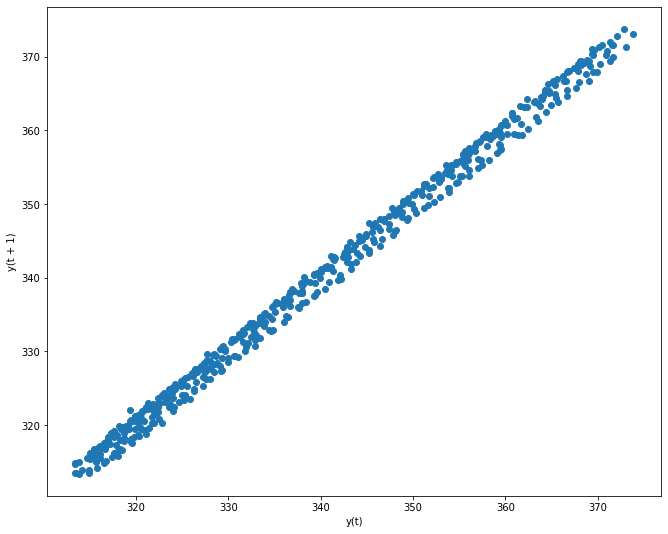

In [12]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(y)
pyplot.show()

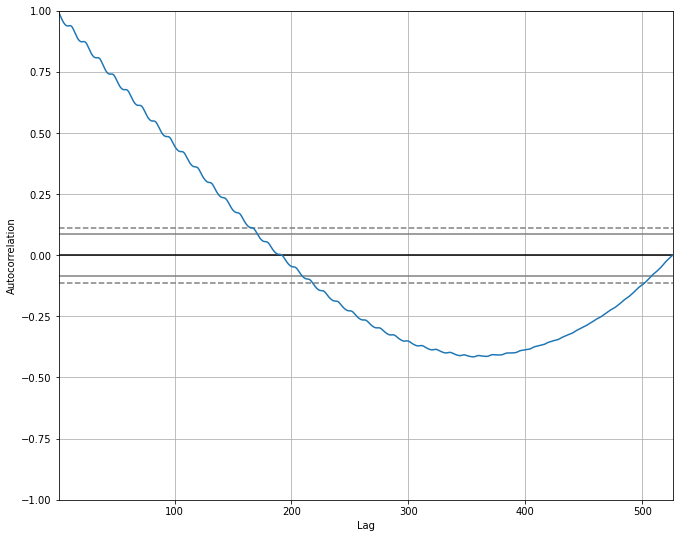

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)
pyplot.show()

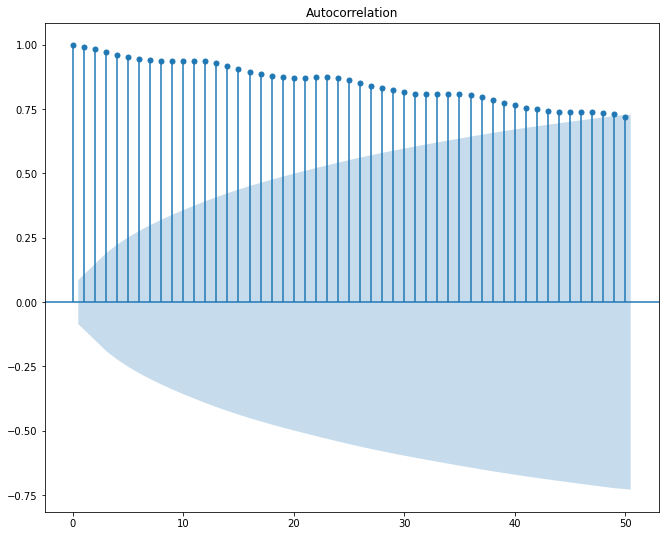

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=50)
pyplot.show()

### Fit autocorrelation model

In [15]:
from statsmodels.tsa.ar_model import AutoReg

train, test = y[1:len(y)-10], y[len(y)-10:]

# train autoregression
model = AutoReg(train, lags=20) #20 lags
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: intercept   -0.690456
co2.L1       0.823893
co2.L2      -0.015577
co2.L3      -0.034012
co2.L4       0.076210
co2.L5       0.037251
co2.L6       0.008664
co2.L7      -0.047074
co2.L8      -0.037452
co2.L9       0.021613
co2.L10     -0.007082
co2.L11      0.277800
co2.L12      0.328453
co2.L13     -0.198850
co2.L14     -0.162530
co2.L15     -0.038481
co2.L16     -0.095040
co2.L17      0.044173
co2.L18      0.016097
co2.L19     -0.019755
co2.L20      0.024346
dtype: float64


### Predict next 10 values

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=372.206536, expected=372.060000
predicted=373.188318, expected=372.775000
predicted=373.611340, expected=373.800000
predicted=373.246231, expected=373.060000
predicted=371.706798, expected=371.300000
predicted=369.733018, expected=369.425000
predicted=368.491993, expected=367.880000
predicted=368.603388, expected=368.050000
predicted=369.852134, expected=369.375000
predicted=371.186511, expected=371.020000
Test RMSE: 0.382


### Plot actual vs predicted

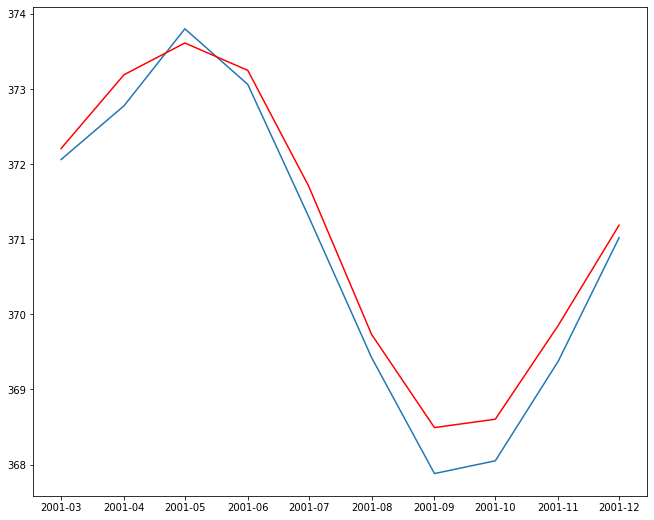

In [17]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### 3. Moving Average Model
> The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.

>It is assumed that both trend and seasonal components have been removed from your time series.
>This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

>There are two main types of moving average that are used: Centered and Trailing Moving Average.
>1. Centered Moving Average -need future values
    * center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))
    * A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.
>2. Trailing Moving Average -on past values only
    * trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))
    
>Moving averages can be used for:
> * data preparation in Python.
> * feature engineering in Python.
> * to make predictions in Python.

> It is used for prediction of single day only based on moving average of last n days


### 4. ARIMA

> The most important model which is comprised of auto regressive, moving average and integration i.e. differencing of terms

>Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models

>An ARIMA model is characterized by 3 terms: p, d, q where,
> 1. p is the order of the AR term
> 2. q is the order of the MA term
> 3. d is the number of differencing required to make the time series stationary

### Time series should be stationary for good result?
> Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

> The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

> The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.


> For good value of d:
> 1. Augmented Dickey Fuller test (adfuller()), from the statsmodels package:
    * p-value<0.5 -stationary
> 2. Check autocorrelation plots if there is slow decreasing type of plot then non stationary
> 3. Adding an **AR term** corrects for mild under-differencing, while adding an **MA term** corrects for mild overdifferencing.

### ARIMA models as other models
> Depending on p,d,q values:
>1. ARIMA(1,0,0) = first-order autoregressive model (AR model)
>2. ARIMA(0,1,0) = random walk:
>3. ARIMA(1,1,0) = differenced first-order autoregressive model
>4. ARIMA(0,1,1) = simple exponential smoothing
>5. ARIMA(0,2,1) or (0,2,2) = linear exponential smoothing
>6. ARIMA(1,0,1) = ARMA model
>7. ARIMA(0,0,1) = MA model
>8. ARIMA(1,1,2) = damped-trend linear exponential smoothing

### ACF and PACF plots
>ACF is for q (MA) - ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.

>PACF is for p (AR) - PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s))

In [18]:
from statsmodels.tsa.stattools import acf, pacf

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


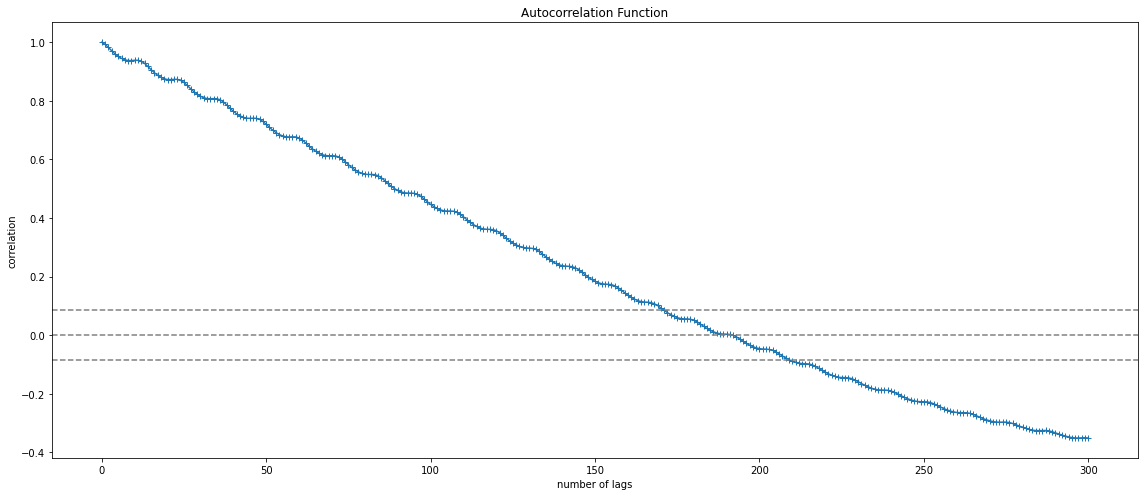

In [19]:
#calling auto correlation function
lag_acf = acf(y, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

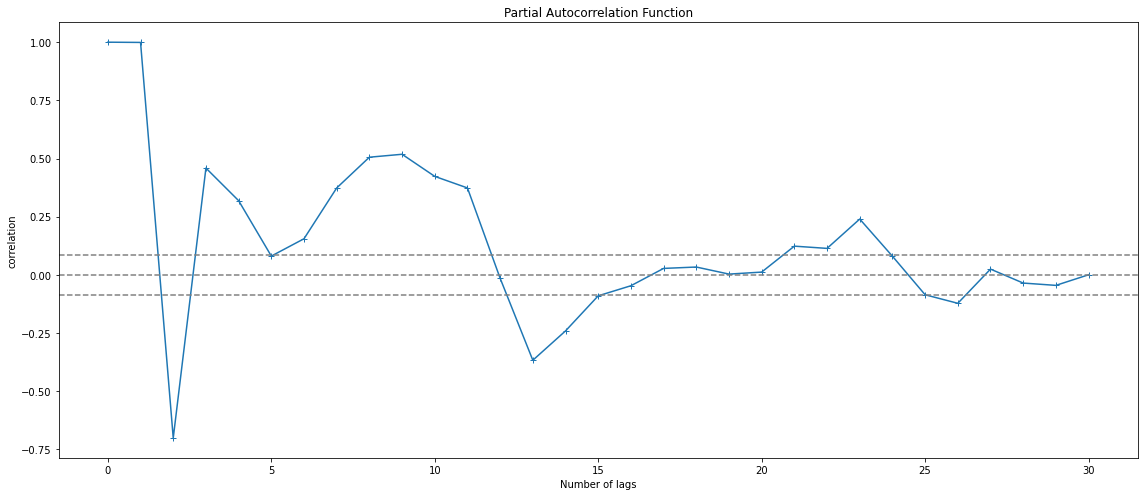

In [20]:
#calling partial correlation function
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [176]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(y, order=(8,1,2))
results = model.fit()
# summary of fit model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(8, 1, 2)   Log Likelihood                -326.691
Date:                Sun, 27 Jun 2021   AIC                            675.381
Time:                        12:28:59   BIC                            722.279
Sample:                    03-01-1958   HQIC                           693.745
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2237      0.049     25.122      0.000       1.128       1.319
ar.L2         -0.9858      0.071    -13.793      0.000      -1.126      -0.846
ar.L3          0.0538      0.079      0.677      0.4

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


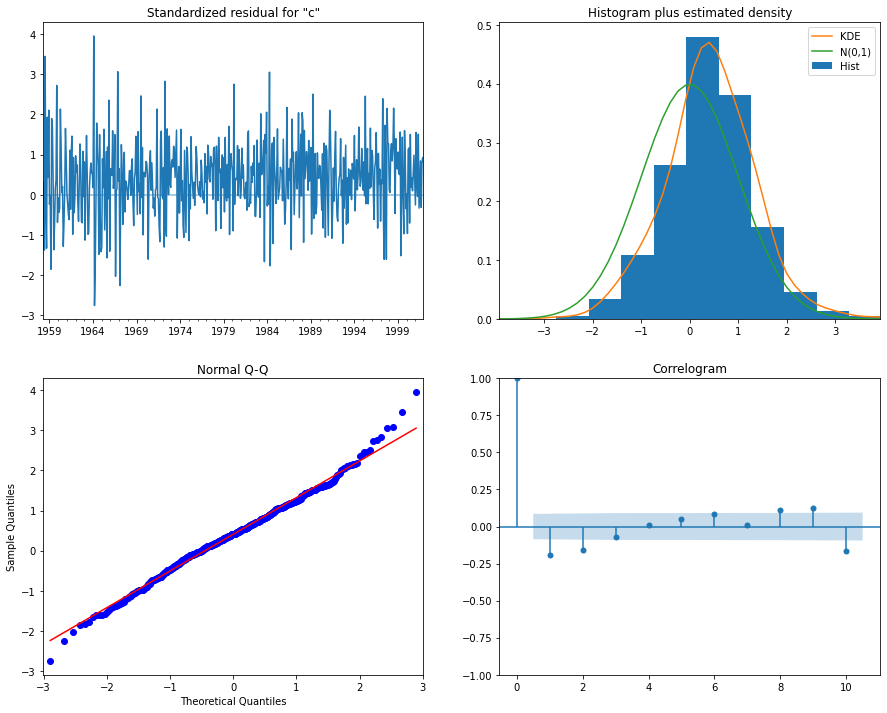

In [154]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# See actual fitting of data

In [155]:
pred = results.get_prediction(start=pd.to_datetime('1959'), dynamic=False)
pred_ci = pred.conf_int()

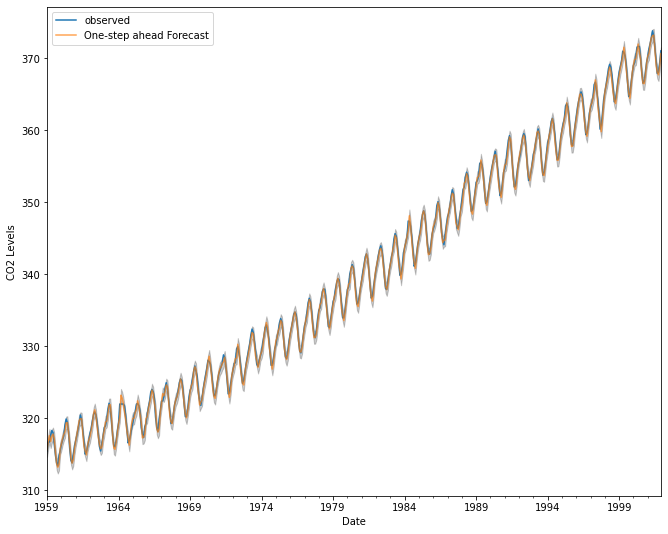

In [156]:
ax = y['1959':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [157]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.18


###  Use data  only till given date for prediction i.e. treat as train and test data

In [158]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

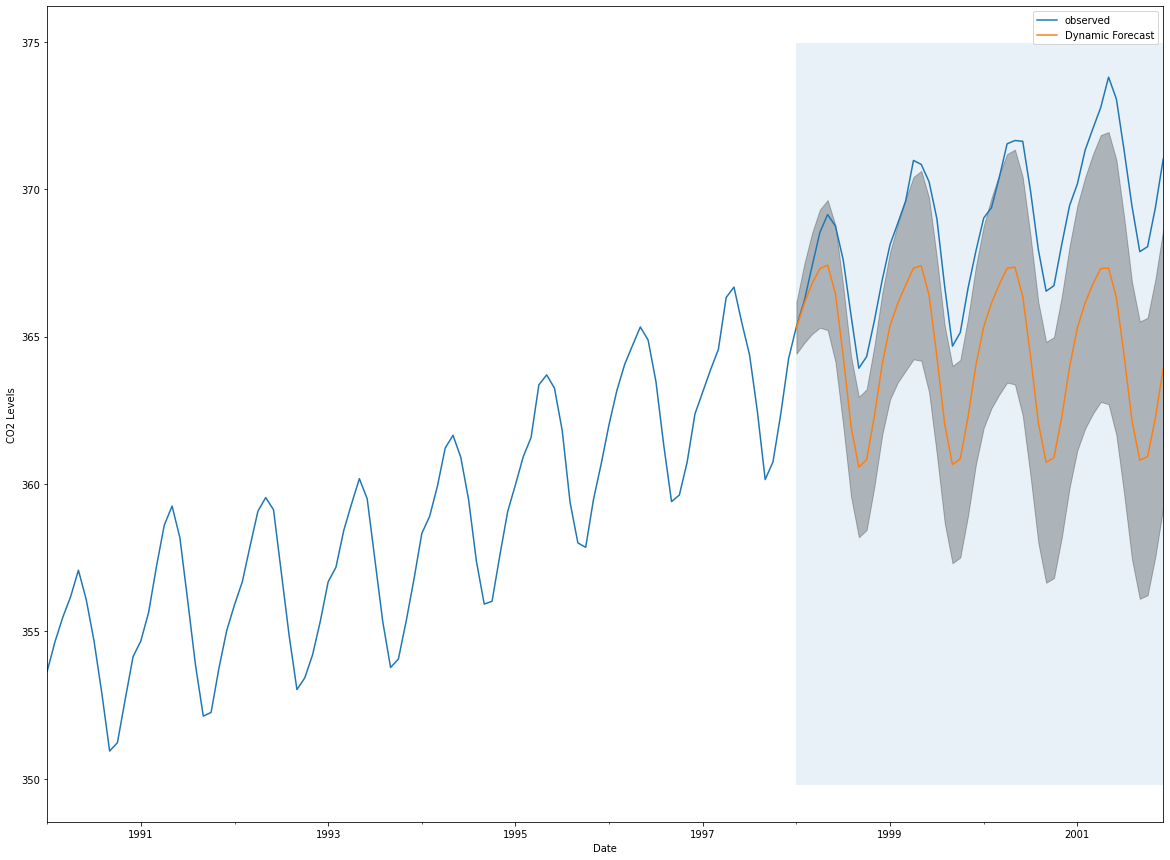

In [159]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [160]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21.88


### Get future predictions

In [170]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

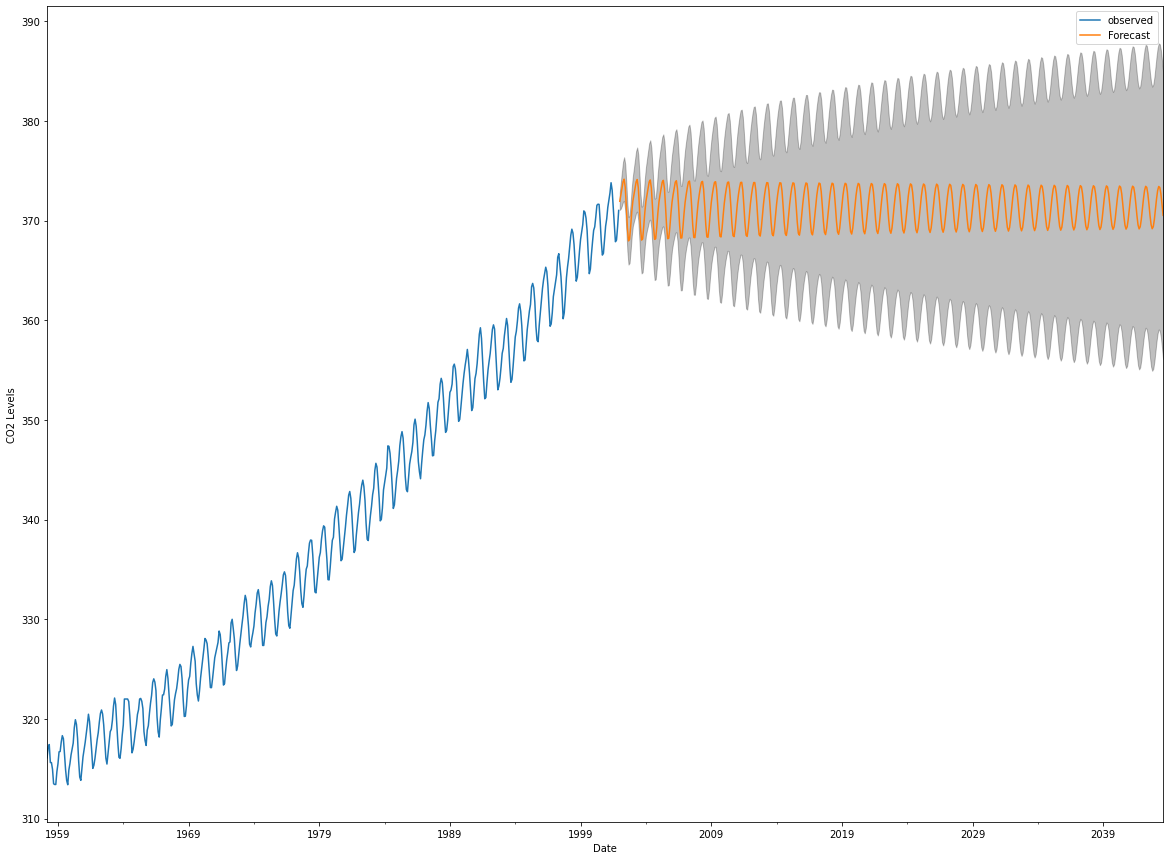

In [171]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [177]:
import pmdarima as pm
model = pm.auto_arima(y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1095.008, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1676.811, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1139.281, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1678.850, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1268.116, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=406.718, Time=2.10 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=601.160, Time=1.27 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=407.168, Time=3.35 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=416.594, Time=5.05 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=996.053, Time=1.21 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=514.717, Time=2.96 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=391.492, Time=4.94 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=407.420, Time=4.52 sec
 ARIMA(1,1,0)(2,0,2)[12] interce

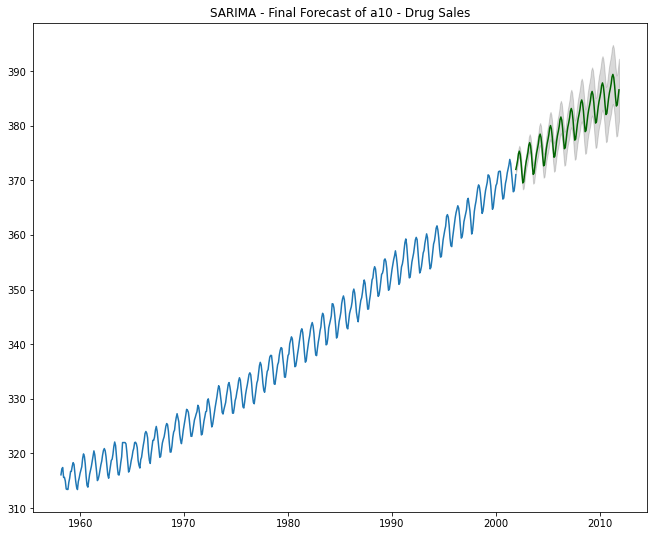

In [183]:
# Forecast
n_periods = 120
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(y.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(y)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()